## Heart Disease Classification

## 1. Import Libraries

In [1]:
# Import needed libraries

import sys
import pandas as pd
import numpy as np
import sklearn
import matplotlib
import keras

import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import pickle

## 2. Data Preparation and Data Exploration

In [2]:
# import the heart disease dataset
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"

# the names will be the names of each column in our pandas DataFrame
names = ['age',
        'gender',
        'cp',
        'trestbps',
        'chol',
        'fbs',
        'restecg',
        'thalach',
        'exang',
        'oldpeak',
        'slope',
        'ca',
        'thal',
        'class']

# read the csv
cleveland = pd.read_csv(url, names=names)

In [3]:
cleveland.shape

(303, 14)

In [4]:

# print the last twenty or so data points
cleveland.loc[280:]

,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,class
280,57.0,1.0,4.0,110.0,335.0,0.0,0.0,143.0,1.0,3.0,2.0,1.0,7.0,2
281,47.0,1.0,3.0,130.0,253.0,0.0,0.0,179.0,0.0,0.0,1.0,0.0,3.0,0
282,55.0,0.0,4.0,128.0,205.0,0.0,1.0,130.0,1.0,2.0,2.0,1.0,7.0,3
283,35.0,1.0,2.0,122.0,192.0,0.0,0.0,174.0,0.0,0.0,1.0,0.0,3.0,0
284,61.0,1.0,4.0,148.0,203.0,0.0,0.0,161.0,0.0,0.0,1.0,1.0,7.0,2
285,58.0,1.0,4.0,114.0,318.0,0.0,1.0,140.0,0.0,4.4,3.0,3.0,6.0,4
286,58.0,0.0,4.0,170.0,225.0,1.0,2.0,146.0,1.0,2.8,2.0,2.0,6.0,2
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,?,7.0,0
288,56.0,1.0,2.0,130.0,221.0,0.0,2.0,163.0,0.0,0.0,1.0,0.0,7.0,0
289,56.0,1.0,2.0,120.0,240.0,0.0,0.0,169.0,0.0,0.0,3.0,0.0,3.0,0


In [5]:
# remove missing data (indicated with a "?")
data = cleveland[~cleveland.isin(['?'])]
data.loc[280:]

,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,class
280,57.0,1.0,4.0,110.0,335.0,0.0,0.0,143.0,1.0,3.0,2.0,1.0,7.0,2
281,47.0,1.0,3.0,130.0,253.0,0.0,0.0,179.0,0.0,0.0,1.0,0.0,3.0,0
282,55.0,0.0,4.0,128.0,205.0,0.0,1.0,130.0,1.0,2.0,2.0,1.0,7.0,3
283,35.0,1.0,2.0,122.0,192.0,0.0,0.0,174.0,0.0,0.0,1.0,0.0,3.0,0
284,61.0,1.0,4.0,148.0,203.0,0.0,0.0,161.0,0.0,0.0,1.0,1.0,7.0,2
285,58.0,1.0,4.0,114.0,318.0,0.0,1.0,140.0,0.0,4.4,3.0,3.0,6.0,4
286,58.0,0.0,4.0,170.0,225.0,1.0,2.0,146.0,1.0,2.8,2.0,2.0,6.0,2
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,NaN,7.0,0
288,56.0,1.0,2.0,130.0,221.0,0.0,2.0,163.0,0.0,0.0,1.0,0.0,7.0,0
289,56.0,1.0,2.0,120.0,240.0,0.0,0.0,169.0,0.0,0.0,3.0,0.0,3.0,0


In [6]:
# drop rows with NaN values from DataFrame
data = data.dropna(axis=0)
data.loc[280:]

,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,class
280,57.0,1.0,4.0,110.0,335.0,0.0,0.0,143.0,1.0,3.0,2.0,1.0,7.0,2
281,47.0,1.0,3.0,130.0,253.0,0.0,0.0,179.0,0.0,0.0,1.0,0.0,3.0,0
282,55.0,0.0,4.0,128.0,205.0,0.0,1.0,130.0,1.0,2.0,2.0,1.0,7.0,3
283,35.0,1.0,2.0,122.0,192.0,0.0,0.0,174.0,0.0,0.0,1.0,0.0,3.0,0
284,61.0,1.0,4.0,148.0,203.0,0.0,0.0,161.0,0.0,0.0,1.0,1.0,7.0,2
285,58.0,1.0,4.0,114.0,318.0,0.0,1.0,140.0,0.0,4.4,3.0,3.0,6.0,4
286,58.0,0.0,4.0,170.0,225.0,1.0,2.0,146.0,1.0,2.8,2.0,2.0,6.0,2
288,56.0,1.0,2.0,130.0,221.0,0.0,2.0,163.0,0.0,0.0,1.0,0.0,7.0,0
289,56.0,1.0,2.0,120.0,240.0,0.0,0.0,169.0,0.0,0.0,3.0,0.0,3.0,0
290,67.0,1.0,3.0,152.0,212.0,0.0,2.0,150.0,0.0,0.8,2.0,0.0,7.0,1


In [7]:
# transform data to numeric to enable further analysis
data = data.apply(pd.to_numeric)


In [8]:

# print data characteristics, usings pandas built-in describe() function
data.describe()

,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,class
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,3.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,1.602694,0.676768,4.730640,0.946128
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,1.938629,1.234551
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


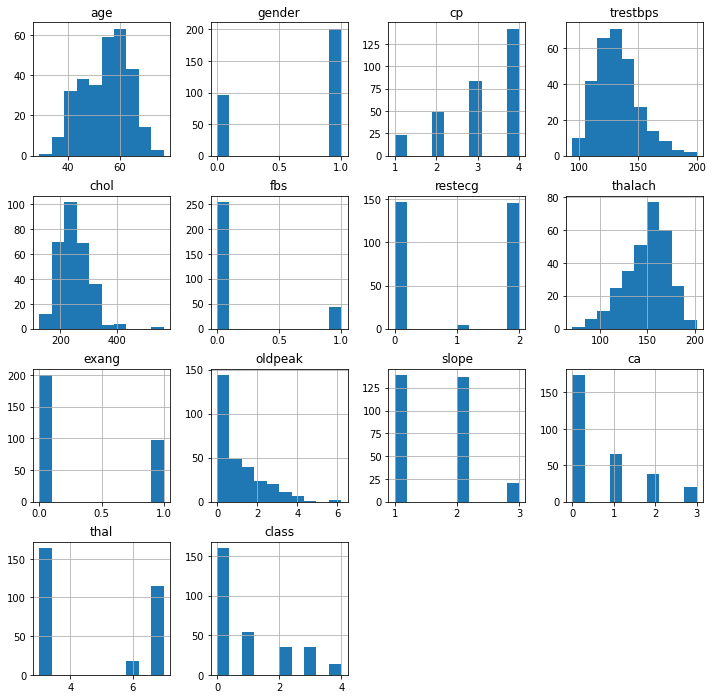

In [9]:

# plot histograms for each variable
data.hist(figsize = (12, 12))
plt.show()

In [10]:
# create X and Y datasets for training
from sklearn import model_selection

X = np.array(data.drop(['class'], 1))
y = np.array(data['class'])

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.2)

In [11]:
# convert the data to categorical labels
from keras.utils.np_utils import to_categorical

Y_train = to_categorical(y_train, num_classes=None)
Y_test = to_categorical(y_test, num_classes=None)
print(Y_train)


[[0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]]


## 3. Building Neural Network Model

In [12]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense


# define a function to build the keras model
def create_model():
    # create model
    model = Sequential()
    model.add(Dense(8, input_dim=13, kernel_initializer='normal', activation='relu'))
    model.add(Dense(4, kernel_initializer='normal', activation='relu'))
    model.add(Dense(5, activation='softmax'))
    
    model.compile(loss='categorical_crossentropy', metrics=['accuracy'])
    return model


model = create_model()




## 4. Training and testing Data

In [13]:

# fit the model to the training data
model.fit(X_train, Y_train, epochs=100, batch_size=10, verbose = 1)

Epoch 1/100
24/24 [==============================] - 30s 2ms/step - loss: 1.6874 - accuracy: 0.1973
Epoch 2/100
24/24 [==============================] - 0s 2ms/step - loss: 1.3569 - accuracy: 0.4756
Epoch 3/100
24/24 [==============================] - 0s 2ms/step - loss: 1.3394 - accuracy: 0.4606
Epoch 4/100
24/24 [==============================] - 0s 2ms/step - loss: 1.3045 - accuracy: 0.4915
Epoch 5/100
24/24 [==============================] - 0s 2ms/step - loss: 1.2424 - accuracy: 0.5372
Epoch 6/100
24/24 [==============================] - 0s 2ms/step - loss: 1.1949 - accuracy: 0.5752
Epoch 7/100
24/24 [==============================] - 0s 2ms/step - loss: 1.1896 - accuracy: 0.5488
Epoch 8/100
24/24 [==============================] - 0s 2ms/step - loss: 1.2113 - accuracy: 0.5243
Epoch 9/100
24/24 [==============================] - 0s 2ms/step - loss: 1.2170 - accuracy: 0.5348
Epoch 10/100
24/24 [==============================] - 0s 2ms/step - loss: 1.2879 - accuracy: 0.4904
Epoch 11

24/24 [==============================] - 0s 2ms/step - loss: 0.8492 - accuracy: 0.6937
Epoch 84/100
24/24 [==============================] - 0s 2ms/step - loss: 0.9480 - accuracy: 0.6351
Epoch 85/100
24/24 [==============================] - 0s 2ms/step - loss: 1.0112 - accuracy: 0.6162
Epoch 86/100
24/24 [==============================] - 0s 2ms/step - loss: 0.9762 - accuracy: 0.6392
Epoch 87/100
24/24 [==============================] - 0s 2ms/step - loss: 0.9330 - accuracy: 0.6398
Epoch 88/100
24/24 [==============================] - 0s 2ms/step - loss: 1.0000 - accuracy: 0.6107
Epoch 89/100
24/24 [==============================] - 0s 2ms/step - loss: 0.9160 - accuracy: 0.6174
Epoch 90/100
24/24 [==============================] - 0s 2ms/step - loss: 0.9029 - accuracy: 0.6357
Epoch 91/100
24/24 [==============================] - 0s 2ms/step - loss: 0.9134 - accuracy: 0.6651
Epoch 92/100
24/24 [==============================] - 0s 2ms/step - loss: 0.9408 - accuracy: 0.6359
Epoch 93/100


In [14]:

# convert into binary classification problem - heart disease or no heart disease
Y_train_binary = y_train.copy()
Y_test_binary = y_test.copy()

Y_train_binary[Y_train_binary > 0] = 1
Y_test_binary[Y_test_binary > 0] = 1



In [23]:

# define a new keras model for binary classification
def create_binary_model():
    # create model
    model = Sequential()
    model.add(Dense(8, input_dim=13, kernel_initializer='normal', activation='relu'))
    model.add(Dense(4, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    # Compile model
    #adam = Adam(lr=0.001)
    model.compile(loss='binary_crossentropy', metrics=['accuracy'])
    return model

binary_model = create_binary_model()


In [24]:
# fit the binary model on the training data
binary_model.fit(X_train, Y_train_binary, epochs=100, batch_size=10, verbose = 1)

Epoch 1/100
24/24 [==============================] - 2s 2ms/step - loss: 0.8152 - accuracy: 0.5156
Epoch 2/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6965 - accuracy: 0.4809
Epoch 3/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6854 - accuracy: 0.4706
Epoch 4/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6800 - accuracy: 0.6035
Epoch 5/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6785 - accuracy: 0.5899
Epoch 6/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6715 - accuracy: 0.6298
Epoch 7/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6723 - accuracy: 0.6390
Epoch 8/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6683 - accuracy: 0.6969
Epoch 9/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6542 - accuracy: 0.6614
Epoch 10/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6455 - accuracy: 0.6688
Epoch 11/

24/24 [==============================] - 0s 3ms/step - loss: 0.4045 - accuracy: 0.8229
Epoch 84/100
24/24 [==============================] - 0s 3ms/step - loss: 0.3686 - accuracy: 0.8911
Epoch 85/100
24/24 [==============================] - 0s 3ms/step - loss: 0.3867 - accuracy: 0.8529
Epoch 86/100
24/24 [==============================] - 0s 3ms/step - loss: 0.3795 - accuracy: 0.8716
Epoch 87/100
24/24 [==============================] - 0s 3ms/step - loss: 0.4480 - accuracy: 0.8309
Epoch 88/100
24/24 [==============================] - 0s 2ms/step - loss: 0.4198 - accuracy: 0.8369
Epoch 89/100
24/24 [==============================] - 0s 3ms/step - loss: 0.4124 - accuracy: 0.8346
Epoch 90/100
24/24 [==============================] - 0s 3ms/step - loss: 0.4293 - accuracy: 0.7913
Epoch 91/100
24/24 [==============================] - 0s 3ms/step - loss: 0.3742 - accuracy: 0.8710
Epoch 92/100
24/24 [==============================] - 0s 3ms/step - loss: 0.3935 - accuracy: 0.8454
Epoch 93/100


In [17]:

# generate classification report using predictions for categorical model
from sklearn.metrics import classification_report, accuracy_score

categorical_pred = np.argmax(model.predict(X_test), axis=1)

print('Results for Categorical Model')
print(accuracy_score(y_test, categorical_pred))
print(classification_report(y_test, categorical_pred,zero_division=0))

Results for Categorical Model
0.6333333333333333
              precision    recall  f1-score   support

           0       0.78      0.92      0.84        38
           1       0.00      0.00      0.00        11
           2       0.00      0.00      0.00         3
           3       0.75      0.60      0.67         5
           4       0.00      0.00      0.00         3

    accuracy                           0.63        60
   macro avg       0.31      0.30      0.30        60
weighted avg       0.56      0.63      0.59        60



In [25]:

# generate classification report using predictions for binary model 
binary_pred = np.round(binary_model.predict(X_test)).astype(int)

print('Results for Binary Model')
print(accuracy_score(Y_test_binary, binary_pred))
print(classification_report(Y_test_binary, binary_pred))

Results for Binary Model
0.8333333333333334
              precision    recall  f1-score   support

           0       0.83      0.92      0.88        38
           1       0.83      0.68      0.75        22

    accuracy                           0.83        60
   macro avg       0.83      0.80      0.81        60
weighted avg       0.83      0.83      0.83        60



In [19]:
from sklearn.metrics import confusion_matrix
cf=confusion_matrix(Y_test_binary, binary_pred)

<AxesSubplot:>

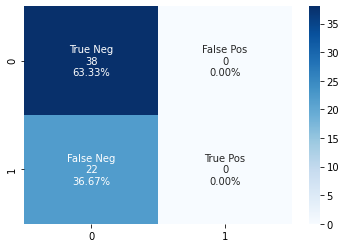

In [21]:

import seaborn as sns
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf.flatten()/np.sum(cf)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf, annot=labels, fmt='', cmap='Blues')